In [156]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [157]:
hockey_test=pd.read_csv('test.csv',encoding = "ISO-8859-1")
hockey_test_salaries=pd.read_csv('test_salaries.csv')
hockey_train=pd.read_csv('train.csv',encoding = "ISO-8859-1")

In [158]:
hockey_test

,Born,City,Pr/St,Cntry,Nat,Ht,Wt,DftYr,DftRd,Ovrl,...,PEND,OPS,DPS,PS,OTOI,Grit,DAP,Pace,GS,GS/G
0,88-11-05,Ithaca,NY,USA,USA,72,216,2003.0,1.0,13.0,...,65,1.9,1.8,3.7,3418.06,243,19.5,110.4,47.3,0.59
1,00-02-29,Prague,NaN,CZE,CZE,72,195,2014.0,1.0,13.0,...,10,0.3,0.3,0.6,826.49,15,10.0,118.6,8.9,0.42
2,92-04-24,St. Louis,MO,USA,USA,75,227,2007.0,6.0,161.0,...,86,3.9,2.0,6.0,3155.13,316,8.9,115.0,52.5,0.65
3,99-07-05,Piikkio,NaN,FIN,FIN,72,182,2013.0,2.0,55.0,...,40,2.3,1.1,3.4,3044.03,105,24.3,111.9,38.1,0.52
4,96-10-27,Niagara Falls,NY,USA,USA,72,196,2011.0,2.0,36.0,...,25,0.8,1.1,1.9,1217.17,67,4.8,105.4,15.9,0.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,97-03-11,Kingston,ON,CAN,CAN,74,219,2011.0,2.0,54.0,...,9,0.1,0.8,0.9,858.75,55,6.3,105.3,2.6,0.12
258,95-01-30,Denver,CO,USA,USA,75,205,2009.0,2.0,44.0,...,5,-0.2,0.1,-0.1,588.65,29,13.0,99.6,0.4,0.03
259,97-06-18,Toronto,ON,CAN,CAN,78,210,2011.0,1.0,9.0,...,97,4.8,4.7,9.5,3133.83,226,2.7,113.6,65.1,0.80
260,98-09-21,Hilton Head Isl.,SC,USA,USA,72,181,2013.0,1.0,30.0,...,59,2.8,1.4,4.2,3076.20,223,7.9,110.8,43.4,0.57


In [159]:
hockey_test_salaries

,Salary
0,7000000.0
1,925000.0
2,2000000.0
3,667500.0
4,600000.0
...,...
257,632500.0
258,600000.0
259,5500000.0
260,832500.0


In [160]:
hockey_train

,Salary,Born,City,Pr/St,Cntry,Nat,Ht,Wt,DftYr,DftRd,...,PEND,OPS,DPS,PS,OTOI,Grit,DAP,Pace,GS,GS/G
0,925000,97-01-30,Sainte-Marie,QC,CAN,CAN,74,190,2015.0,1.0,...,1.0,0.0,-0.2,-0.2,40.03,1,0.0,175.7,-0.4,-0.38
1,2250000,93-12-21,Ottawa,ON,CAN,CAN,74,207,2012.0,1.0,...,98.0,-0.2,3.4,3.2,2850.59,290,13.3,112.5,14.1,0.18
2,8000000,88-04-16,St. Paul,MN,USA,USA,72,218,2006.0,1.0,...,70.0,3.7,1.3,5.0,2486.75,102,6.6,114.8,36.8,0.57
3,3500000,92-01-07,Ottawa,ON,CAN,CAN,77,220,2010.0,1.0,...,22.0,0.0,0.4,0.5,1074.41,130,17.5,105.1,5.9,0.20
4,1750000,94-03-29,Toronto,ON,CAN,CAN,76,217,2012.0,1.0,...,68.0,-0.1,1.4,1.3,3459.09,425,8.3,99.5,21.8,0.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,600000,92-09-26,Denver,CO,USA,USA,73,201,2011.0,3.0,...,47.0,0.0,1.3,1.3,3023.36,100,6.9,103.6,23.2,0.33
608,9000000,85-01-21,Madison,WI,USA,USA,74,206,2003.0,1.0,...,112.0,2.7,6.6,9.3,2715.54,213,6.3,111.3,44.1,0.54
609,4250000,87-03-30,Montreal,QC,CAN,CAN,73,205,2005.0,2.0,...,75.0,1.7,4.1,5.8,2855.83,200,4.1,108.8,32.5,0.43
610,7000000,82-10-31,Kladno,NaN,CZE,CZE,71,196,2001.0,3.0,...,74.0,0.5,1.9,2.4,3287.74,126,7.3,113.2,38.7,0.50


In [161]:
hockey_test_salaries=list(hockey_test_salaries['Salary'].values)
hockey_train_salaries = list(hockey_train['Salary'])
hockey_train = hockey_train.drop('Salary',axis=1)

In [162]:
from datetime import datetime
def elapsed_days(start, end=datetime(2016,10,12)):
    x = (end - start)
    return x.days
hockey_train['age_season_start'] = hockey_train.apply(lambda x: 
    elapsed_days(datetime.strptime(x['Born'], '%y-%m-%d')) ,axis=1)

hockey_test['age_season_start'] = hockey_test.apply(lambda x: 
    elapsed_days(datetime.strptime(x['Born'], '%y-%m-%d')) ,axis=1)

In [163]:
hockey_train

,Born,City,Pr/St,Cntry,Nat,Ht,Wt,DftYr,DftRd,Ovrl,...,OPS,DPS,PS,OTOI,Grit,DAP,Pace,GS,GS/G,age_season_start
0,97-01-30,Sainte-Marie,QC,CAN,CAN,74,190,2015.0,1.0,18.0,...,0.0,-0.2,-0.2,40.03,1,0.0,175.7,-0.4,-0.38,7195
1,93-12-21,Ottawa,ON,CAN,CAN,74,207,2012.0,1.0,15.0,...,-0.2,3.4,3.2,2850.59,290,13.3,112.5,14.1,0.18,8331
2,88-04-16,St. Paul,MN,USA,USA,72,218,2006.0,1.0,7.0,...,3.7,1.3,5.0,2486.75,102,6.6,114.8,36.8,0.57,10406
3,92-01-07,Ottawa,ON,CAN,CAN,77,220,2010.0,1.0,3.0,...,0.0,0.4,0.5,1074.41,130,17.5,105.1,5.9,0.20,9045
4,94-03-29,Toronto,ON,CAN,CAN,76,217,2012.0,1.0,16.0,...,-0.1,1.4,1.3,3459.09,425,8.3,99.5,21.8,0.27,8233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,92-09-26,Denver,CO,USA,USA,73,201,2011.0,3.0,82.0,...,0.0,1.3,1.3,3023.36,100,6.9,103.6,23.2,0.33,8782
608,85-01-21,Madison,WI,USA,USA,74,206,2003.0,1.0,7.0,...,2.7,6.6,9.3,2715.54,213,6.3,111.3,44.1,0.54,11587
609,87-03-30,Montreal,QC,CAN,CAN,73,205,2005.0,2.0,35.0,...,1.7,4.1,5.8,2855.83,200,4.1,108.8,32.5,0.43,10789
610,82-10-31,Kladno,NaN,CZE,CZE,71,196,2001.0,3.0,71.0,...,0.5,1.9,2.4,3287.74,126,7.3,113.2,38.7,0.50,12400


In [164]:
hockey_train = hockey_train.drop(['City', 'Pr/St', 'Cntry', 'Last Name', 'First Name', 'Team', 'Born'],axis=1)
hockey_train

,Nat,Ht,Wt,DftYr,DftRd,Ovrl,Hand,Position,GP,G,...,OPS,DPS,PS,OTOI,Grit,DAP,Pace,GS,GS/G,age_season_start
0,CAN,74,190,2015.0,1.0,18.0,L,D,1,0,...,0.0,-0.2,-0.2,40.03,1,0.0,175.7,-0.4,-0.38,7195
1,CAN,74,207,2012.0,1.0,15.0,R,D,79,2,...,-0.2,3.4,3.2,2850.59,290,13.3,112.5,14.1,0.18,8331
2,USA,72,218,2006.0,1.0,7.0,R,RW,65,19,...,3.7,1.3,5.0,2486.75,102,6.6,114.8,36.8,0.57,10406
3,CAN,77,220,2010.0,1.0,3.0,R,D,30,1,...,0.0,0.4,0.5,1074.41,130,17.5,105.1,5.9,0.20,9045
4,CAN,76,217,2012.0,1.0,16.0,R,RW,82,7,...,-0.1,1.4,1.3,3459.09,425,8.3,99.5,21.8,0.27,8233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,USA,73,201,2011.0,3.0,82.0,R,C,70,6,...,0.0,1.3,1.3,3023.36,100,6.9,103.6,23.2,0.33,8782
608,USA,74,206,2003.0,1.0,7.0,L,D,82,9,...,2.7,6.6,9.3,2715.54,213,6.3,111.3,44.1,0.54,11587
609,CAN,73,205,2005.0,2.0,35.0,L,D,75,6,...,1.7,4.1,5.8,2855.83,200,4.1,108.8,32.5,0.43,10789
610,CZE,71,196,2001.0,3.0,71.0,L,C,78,10,...,0.5,1.9,2.4,3287.74,126,7.3,113.2,38.7,0.50,12400


In [165]:
hockey_test = hockey_test.drop(['City', 'Pr/St', 'Cntry', 'Last Name', 'First Name', 'Team', 'Born'],axis=1)

In [166]:
hockey_train

,Nat,Ht,Wt,DftYr,DftRd,Ovrl,Hand,Position,GP,G,...,OPS,DPS,PS,OTOI,Grit,DAP,Pace,GS,GS/G,age_season_start
0,CAN,74,190,2015.0,1.0,18.0,L,D,1,0,...,0.0,-0.2,-0.2,40.03,1,0.0,175.7,-0.4,-0.38,7195
1,CAN,74,207,2012.0,1.0,15.0,R,D,79,2,...,-0.2,3.4,3.2,2850.59,290,13.3,112.5,14.1,0.18,8331
2,USA,72,218,2006.0,1.0,7.0,R,RW,65,19,...,3.7,1.3,5.0,2486.75,102,6.6,114.8,36.8,0.57,10406
3,CAN,77,220,2010.0,1.0,3.0,R,D,30,1,...,0.0,0.4,0.5,1074.41,130,17.5,105.1,5.9,0.20,9045
4,CAN,76,217,2012.0,1.0,16.0,R,RW,82,7,...,-0.1,1.4,1.3,3459.09,425,8.3,99.5,21.8,0.27,8233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,USA,73,201,2011.0,3.0,82.0,R,C,70,6,...,0.0,1.3,1.3,3023.36,100,6.9,103.6,23.2,0.33,8782
608,USA,74,206,2003.0,1.0,7.0,L,D,82,9,...,2.7,6.6,9.3,2715.54,213,6.3,111.3,44.1,0.54,11587
609,CAN,73,205,2005.0,2.0,35.0,L,D,75,6,...,1.7,4.1,5.8,2855.83,200,4.1,108.8,32.5,0.43,10789
610,CZE,71,196,2001.0,3.0,71.0,L,C,78,10,...,0.5,1.9,2.4,3287.74,126,7.3,113.2,38.7,0.50,12400


In [167]:
hockey_train.columns.to_series().groupby(hockey_train.dtypes).groups

{int64: ['Ht', 'Wt', 'GP', 'G', 'A', 'A1', 'A2', 'PTS', '+/-', 'PIM', 'Shifts', 'TOI', 'Diff', 'iCF.1', 'iSF.1', 'iSF.2', 'iHF', 'iMiss', 'iGVA', 'iTKA', 'iBLK', 'iFOW', 'iFOL', 'dzFOW', 'dzFOL', 'nzFOW', 'nzFOL', 'ozFOW', 'ozFOL', 'FOW.Up', 'FOL.Up', 'FOW.Down', 'FOL.Down', 'FOW.Close', 'FOL.Close', 'OTG', '1G', 'GWG', 'ENG', 'PSG', 'PSA', 'G.Bkhd', 'G.Dflct', 'G.Slap', 'G.Snap', 'G.Tip', 'G.Wrap', 'G.Wrst', 'CBar ', 'Post', 'Over', 'Wide', 'S.Bkhd', 'S.Dflct', 'S.Slap', 'S.Snap', 'S.Tip', 'S.Wrap', 'S.Wrst', 'iPenT', 'iPenD', 'iPenDf', 'Min', 'Maj', 'Match', 'Misc', 'Game', 'DSF', 'DSA', 'Grit', 'age_season_start'], float64: ['DftYr', 'DftRd', 'Ovrl', 'E+/-', 'TOIX', 'TOI/GP', 'TOI/GP.1', 'TOI%', 'IPP%', 'SH%', 'SV%', 'PDO', 'F/60', 'A/60', 'Pct%', 'Diff/60', 'iCF', 'iFF', 'iSF', 'ixG', 'iSCF', 'iRB', 'iRS', 'iDS', 'sDist', 'sDist.1', 'Pass', 'iHF.1', 'iHA', 'iHDf', 'iGVA.1', 'iTKA.1', 'iBLK.1', 'BLK%', 'iFOW.1', 'iFOL.1', 'FO%', '%FOT', 'iPENT', 'iPEND', 'NPD', 'CF', 'CA', 'FF', 'FA

In [168]:
hockey_train = hockey_train.drop("Nat",axis=1)
hockey_test = hockey_test.drop("Nat",axis=1)

In [169]:
hockey_train["Position"]

0       D
1       D
2      RW
3       D
4      RW
       ..
607     C
608     D
609     D
610     C
611     D
Name: Position, Length: 612, dtype: object

In [170]:
hockey_train["Hand"]

0      L
1      R
2      R
3      R
4      R
      ..
607    R
608    L
609    L
610    L
611    R
Name: Hand, Length: 612, dtype: object

In [171]:
hockey_train_Hand = pd.get_dummies(hockey_train["Hand"])
hockey_train = pd.concat([hockey_train,hockey_train_Hand], axis=1)
hockey_train = hockey_train.drop("Hand",axis=1)

In [172]:
hockey_test_Hand = pd.get_dummies(hockey_test["Hand"])
hockey_test = pd.concat([hockey_test,hockey_test_Hand], axis=1)
hockey_test = hockey_test.drop("Hand",axis=1)

In [173]:
hockey_train_Position = pd.get_dummies(hockey_train["Position"])
hockey_train = pd.concat([hockey_train,hockey_train_Position], axis=1)
hockey_train = hockey_train.drop("Position",axis=1)
hockey_test_Position = pd.get_dummies(hockey_test["Position"])
hockey_test = pd.concat([hockey_test,hockey_test_Position], axis=1)
hockey_test = hockey_test.drop("Position",axis=1)

In [174]:
hockey_train.columns[hockey_train.isnull().any()]

Index(['DftYr', 'DftRd', 'Ovrl', 'TOIX', 'TOI%', 'IPP%', 'SH%', 'SV%', 'PDO',
       'F/60', 'A/60', 'Diff/60', 'iCF', 'iFF', 'iSF', 'ixG', 'iSCF', 'iRB',
       'iRS', 'iDS', 'sDist.1', 'Pass', 'iHF.1', 'iHA', 'iHDf', 'iGVA.1',
       'iTKA.1', 'iBLK.1', 'BLK%', 'iFOW.1', 'iFOL.1', '%FOT', 'iPENT',
       'iPEND', 'CF', 'CA', 'FF', 'FA', 'SF', 'SA', 'xGF', 'xGA', 'SCF', 'SCA',
       'GF', 'GA', 'RBF', 'RBA', 'RSF', 'RSA', 'FOW', 'FOL', 'HF', 'HA', 'GVA',
       'TKA', 'PENT', 'PEND', 'OTOI', 'Pace', 'GS', 'GS/G'],
      dtype='object')

In [175]:
obj = hockey_train.isnull().sum()
for key,value in obj.iteritems():
    print(key,",",value)

Ht , 0
Wt , 0
DftYr , 100
DftRd , 100
Ovrl , 100
GP , 0
G , 0
A , 0
A1 , 0
A2 , 0
PTS , 0
+/- , 0
E+/- , 0
PIM , 0
Shifts , 0
TOI , 0
TOIX , 1
TOI/GP , 0
TOI/GP.1 , 0
TOI% , 1
IPP% , 1
SH% , 2
SV% , 1
PDO , 2
F/60 , 1
A/60 , 1
Pct% , 0
Diff , 0
Diff/60 , 1
iCF , 8
iCF.1 , 0
iFF , 8
iSF , 8
iSF.1 , 0
iSF.2 , 0
ixG , 1
iSCF , 1
iRB , 8
iRS , 1
iDS , 7
sDist , 0
sDist.1 , 16
Pass , 1
iHF , 0
iHF.1 , 1
iHA , 9
iHDf , 8
iMiss , 0
iGVA , 0
iTKA , 0
iBLK , 0
iGVA.1 , 1
iTKA.1 , 1
iBLK.1 , 1
BLK% , 1
iFOW , 0
iFOL , 0
iFOW.1 , 1
iFOL.1 , 1
FO% , 0
%FOT , 1
dzFOW , 0
dzFOL , 0
nzFOW , 0
nzFOL , 0
ozFOW , 0
ozFOL , 0
FOW.Up , 0
FOL.Up , 0
FOW.Down , 0
FOL.Down , 0
FOW.Close , 0
FOL.Close , 0
OTG , 0
1G , 0
GWG , 0
ENG , 0
PSG , 0
PSA , 0
G.Bkhd , 0
G.Dflct , 0
G.Slap , 0
G.Snap , 0
G.Tip , 0
G.Wrap , 0
G.Wrst , 0
CBar  , 0
Post , 0
Over , 0
Wide , 0
S.Bkhd , 0
S.Dflct , 0
S.Slap , 0
S.Snap , 0
S.Tip , 0
S.Wrap , 0
S.Wrst , 0
iPenT , 0
iPenD , 0
iPENT , 1
iPEND , 1
iPenDf , 0
NPD , 0
Min , 0
Maj 

In [176]:
X_train = hockey_train
X_test = hockey_test
y_train = hockey_train_salaries
y_test = hockey_test_salaries

In [177]:
from xgboost import XGBRegressor
xgbr=XGBRegressor()
xgbr.fit(X_train,y_train)
xgbrpredictions= xgbr.predict(X_test)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, xgbrpredictions))
print('MSE:', metrics.mean_squared_error(y_test, xgbrpredictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, xgbrpredictions)))

MAE: 971937.447519084
MSE: 2483664305463.6616
RMSE: 1575964.5635177402


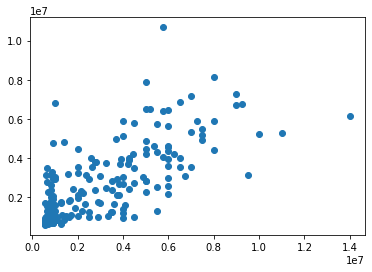

In [178]:
plt.scatter(x=y_test,y=xgbrpredictions)

In [136]:
hockey_train = hockey_train.drop(["DftYr" ,"DftRd" ,"Ovrl"],axis=1)
hockey_test = hockey_test.drop(["DftYr" ,"DftRd" ,"Ovrl"],axis=1)

In [139]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="median")

In [140]:
hockey_train = imputer.fit_transform(hockey_train)
hockey_test = imputer.fit_transform(hockey_test)
hockey_train

array([[ 74., 190.,   1., ...,   0.,   0.,   0.],
       [ 74., 207.,  79., ...,   0.,   0.,   0.],
       [ 72., 218.,  65., ...,   0.,   0.,   0.],
       ...,
       [ 73., 205.,  75., ...,   0.,   0.,   0.],
       [ 71., 196.,  78., ...,   0.,   0.,   0.],
       [ 78., 226.,  81., ...,   0.,   0.,   0.]])

In [111]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [112]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
models = []
models.append(('KNN', KNeighborsRegressor()))
models.append(('XGB', XGBRegressor()))
models.append(('SVM', SVR()))
models.append(('Random_Forest',RandomForestRegressor()))
models.append(('Decision_Tree',DecisionTreeRegressor()))
models.append(('Linear_Regression',LinearRegression()))
results = []
names = []
cross_validate_fs=[]
for name, model in models:
    kfold = RepeatedStratifiedKFold(n_splits=10,n_repeats=3)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    cross_validate_fs.append(cv_results.mean())
    print("%s: %f " % (name, cv_results.mean()))

C:\Users\aabas\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\aabas\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\aabas\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\aabas\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


KNN: -3043220194877.131836 


C:\Users\aabas\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\aabas\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


XGB: -2151261590669.793945 


C:\Users\aabas\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\aabas\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\aabas\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


SVM: -6790447657622.923828 


C:\Users\aabas\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\aabas\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\aabas\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


Random_Forest: -1866770562441.065430 


C:\Users\aabas\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\aabas\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\aabas\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


Decision_Tree: -4361397078362.831543 


C:\Users\aabas\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\aabas\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


Linear_Regression: -4016159354524363054585277237428224.000000 


C:\Users\aabas\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


In [113]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
model = Sequential()

model.add(Dense(147,activation='relu'))
model.add(Dense(147,activation='relu'))
model.add(Dense(147,activation='relu'))
model.add(Dense(147,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [115]:
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=128,epochs=400)

ValueError: Failed to find data adapter that can handle input: <class 'numpy.ndarray'>, (<class 'list'> containing values of types {"<class 'int'>"})